In [1]:
from qiskit.pulse.library.parametric_pulses import (
    Gaussian as ParametricGaussian, 
    GaussianSquare as ParametricGaussianSquare, 
    Drag as ParametricDrag, 
    Constant as ParametricConstant
)
from qiskit.pulse import Gaussian, GaussianSquare, Drag, Constant
from qiskit.circuit import Parameter

from qiskit import circuit, pulse, transpile, schedule, quantum_info as qi
from qiskit.test.mock import FakeBogota

CPU times: user 1.46 s, sys: 237 ms, total: 1.7 s
Wall time: 1.41 s


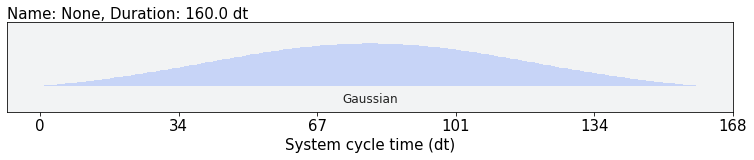

In [2]:
%%time

# It's slow for the fisrt time due to sympy import + lambdify
waveform = Gaussian(160, 0.1, 40)
waveform.draw()

Gaussian pulse

CPU times: user 92.3 ms, sys: 29.9 ms, total: 122 ms
Wall time: 37.3 ms


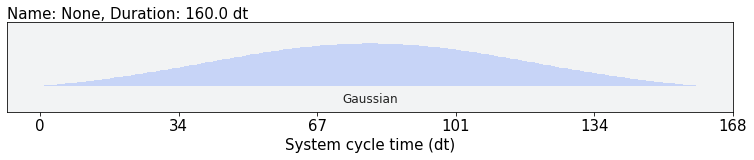

In [3]:
%%time
waveform = Gaussian(160, 0.1, 40)
waveform.draw()

CPU times: user 74.6 ms, sys: 21.4 ms, total: 96.1 ms
Wall time: 33.4 ms


<timed exec>:1: DeprecationWarning: ParametricPulse and its subclass have been deprecated and will be replaced with SymbolicPulse and its subclass because of QPY serialization support. See qiskit.pulse.library.symbolic_pulses for details.


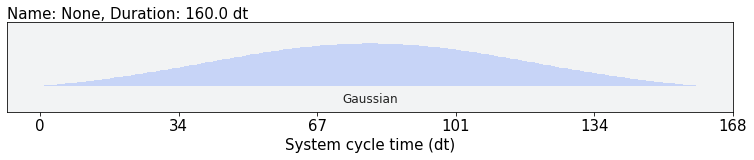

In [5]:
%%time
waveform = ParametricGaussian(160, 0.1, 40)
waveform.draw()

Gaussian Square pulse

CPU times: user 157 ms, sys: 30.4 ms, total: 188 ms
Wall time: 79.3 ms


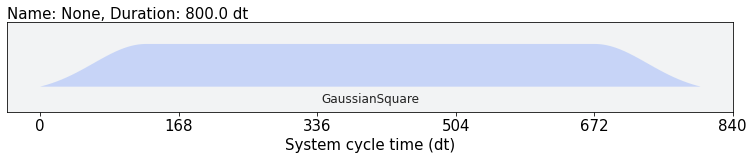

In [6]:
%%time
waveform = GaussianSquare(800, 0.4, 64, risefall_sigma_ratio=2)
waveform.draw()

CPU times: user 76.8 ms, sys: 18.5 ms, total: 95.3 ms
Wall time: 39.5 ms


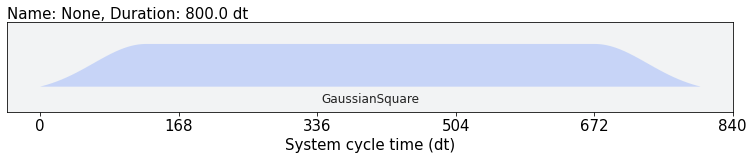

In [7]:
%%time
waveform = GaussianSquare(800, 0.4, 64, risefall_sigma_ratio=2)
waveform.draw()

CPU times: user 74.7 ms, sys: 19.5 ms, total: 94.1 ms
Wall time: 33.4 ms


<timed exec>:1: DeprecationWarning: ParametricPulse and its subclass have been deprecated and will be replaced with SymbolicPulse and its subclass because of QPY serialization support. See qiskit.pulse.library.symbolic_pulses for details.


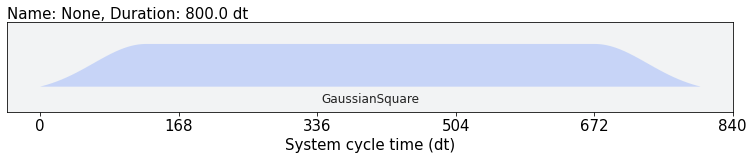

In [8]:
%%time
waveform = ParametricGaussianSquare(800, 0.4, 64, risefall_sigma_ratio=2)
waveform.draw()

DRAG pulse

CPU times: user 277 ms, sys: 29.7 ms, total: 306 ms
Wall time: 181 ms


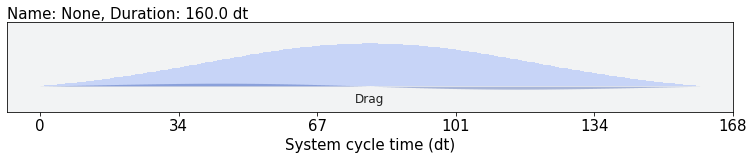

In [9]:
%%time
waveform = Drag(160, 0.1, 40, 5)
waveform.draw()

CPU times: user 67.7 ms, sys: 17.1 ms, total: 84.8 ms
Wall time: 28.8 ms


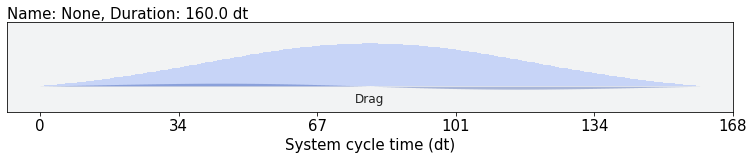

In [10]:
%%time
waveform = Drag(160, 0.1, 40, 5)
waveform.draw()

CPU times: user 63.5 ms, sys: 15.3 ms, total: 78.7 ms
Wall time: 26.7 ms


<timed exec>:1: DeprecationWarning: ParametricPulse and its subclass have been deprecated and will be replaced with SymbolicPulse and its subclass because of QPY serialization support. See qiskit.pulse.library.symbolic_pulses for details.


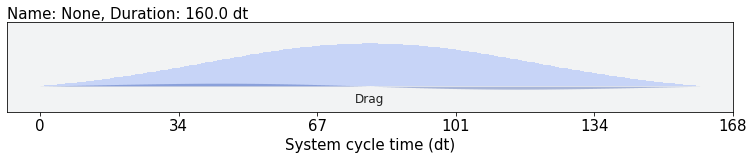

In [11]:
%%time
waveform = ParametricDrag(160, 0.1, 40, 5)
waveform.draw()

Constant pulse

CPU times: user 180 ms, sys: 23.8 ms, total: 203 ms
Wall time: 88.4 ms


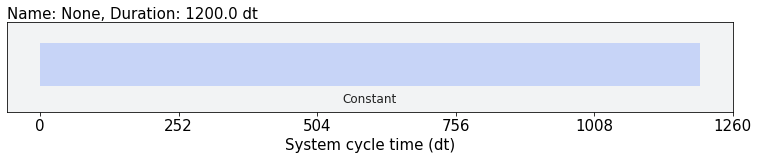

In [12]:
%%time
waveform = Constant(1200, 0.1)
waveform.draw()

CPU times: user 58.4 ms, sys: 15.3 ms, total: 73.7 ms
Wall time: 25.1 ms


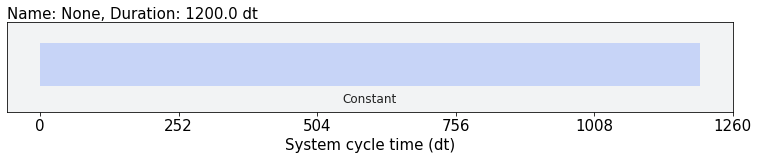

In [13]:
%%time
waveform = Constant(1200, 0.1)
waveform.draw()

CPU times: user 60.2 ms, sys: 12.9 ms, total: 73.2 ms
Wall time: 25.1 ms


<timed exec>:1: DeprecationWarning: ParametricPulse and its subclass have been deprecated and will be replaced with SymbolicPulse and its subclass because of QPY serialization support. See qiskit.pulse.library.symbolic_pulses for details.


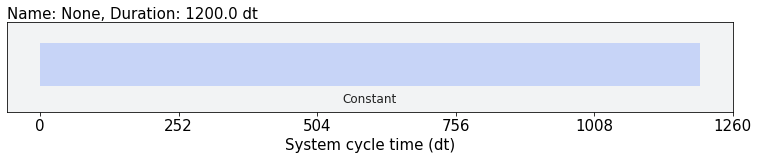

In [14]:
%%time
waveform = ParametricConstant(1200, 0.1)
waveform.draw()

Long schedule

In [15]:
backend = FakeBogota()

This is now replaced with symbolic pulses

In [16]:
cx_sched = backend.defaults().instruction_schedule_map.get("cx", (0, 1))
backendpulse = cx_sched.filter(instruction_types=[pulse.Play]).instructions[0][1].pulse
backendpulse

Drag(duration=160, amp=(-0.0010788341431635037+0.09476065182907585j), sigma=40, beta=-1.1465359856660653, name='drag_2e47')

In [17]:
type(backendpulse)

qiskit.pulse.library.symbolic_pulses.Drag

In [18]:
circ = circuit.QuantumCircuit(2)
su4 = qi.random_unitary(4, seed=123).to_instruction()
circ.compose(su4, [0, 1], inplace=True)
circ.measure_all()

circ.draw()

┌──────────┐ ░ ┌─┐   
   q_0: ┤0         ├─░─┤M├───
        │  Unitary │ ░ └╥┘┌─┐
   q_1: ┤1         ├─░──╫─┤M├
        └──────────┘ ░  ║ └╥┘
meas: 2/════════════════╩══╩═
                        0  1

In [19]:
%%timeit
schedule(transpile(circ, backend), backend)

41.8 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
sched = schedule(transpile(circ, backend), backend)

CPU times: user 507 ms, sys: 54.5 ms, total: 562 ms
Wall time: 339 ms


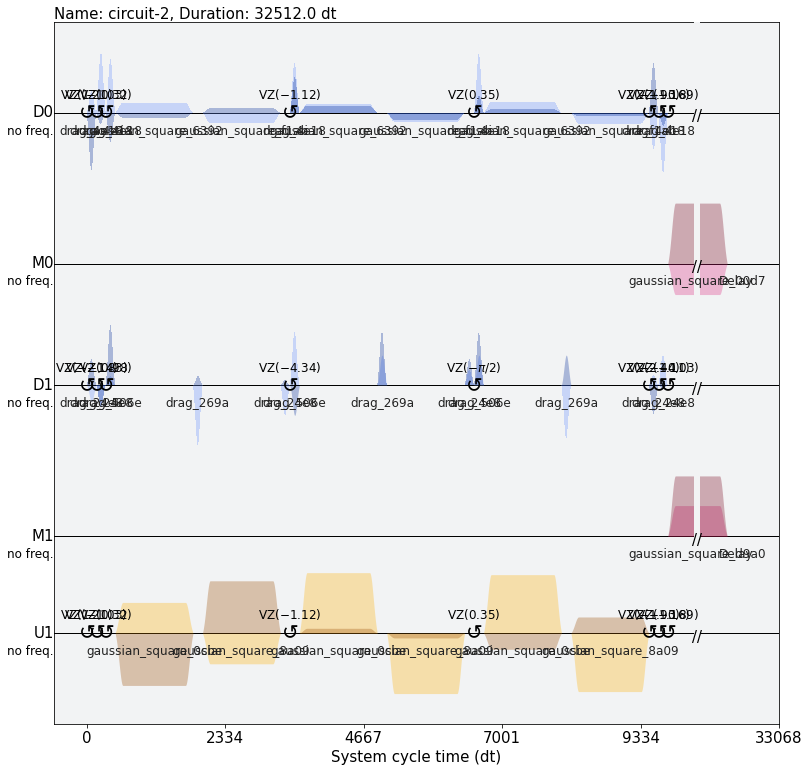

In [21]:
%%time
sched.draw()